In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [27]:
# Load the dataset
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Check the first few rows and column names
print(data.head())
print(data.columns)

# Summary statistics of the dataset
print(data.describe())
print("Colnum : ", len(data.columns))
print("Rownum : ", len(data))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [28]:
# Remove duplicates
print("Number of rows before removing duplicates: ", len(data))
data.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates: ", len(data))

# Encode Diabetes_012 into binary values (0 and 1)
data['Diabetes'] = np.where(data['Diabetes_012'].isin([1, 2]), 1, 0)
data.drop(columns=['Diabetes_012'], inplace=True)
print("Diabetes values:")
print(data['Diabetes'].value_counts(dropna=False))

Number of rows before removing duplicates:  253680
Number of rows after removing duplicates:  229781
Diabetes values:
0    190055
1     39726
Name: Diabetes, dtype: int64


In [30]:
# Unique values in each column
print(data.nunique())

# Unique values for Diabetes_012
print(data['Diabetes'].value_counts(dropna=False))

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes                 2
dtype: int64
0    190055
1     39726
Name: Diabetes, dtype: int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump   

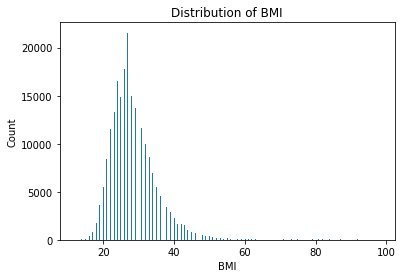

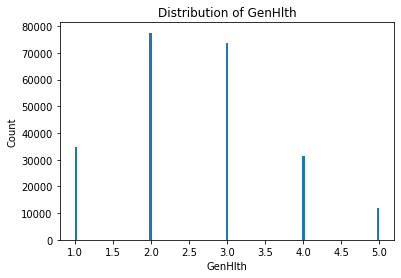

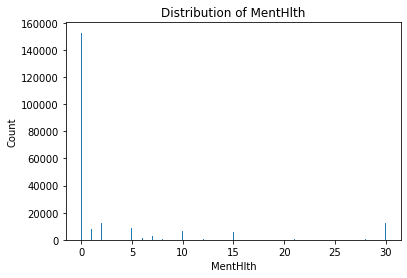

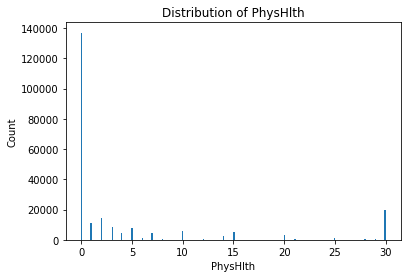

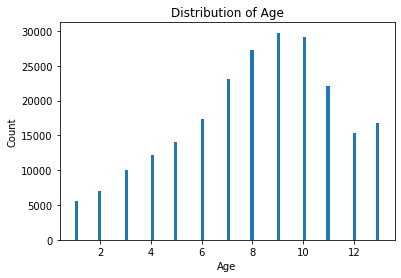

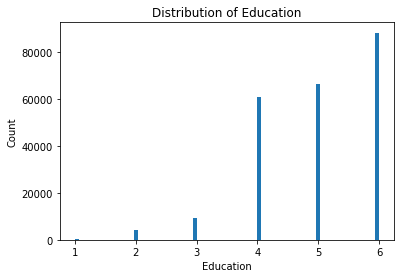

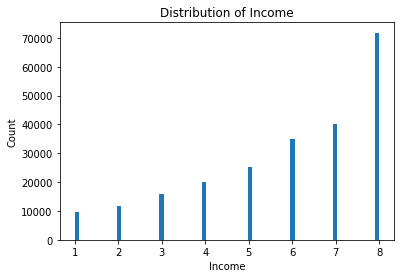

In [31]:
# Visualize histograms for non-binary numeric columns
non_binary_numeric_columns = data.select_dtypes(include=np.number).columns[data.nunique() > 2]
for col in non_binary_numeric_columns:
    plt.hist(data[col], bins='auto')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# Visualize boxplots for selected columns
columns_of_interest = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for col in columns_of_interest:
    sns.boxplot(x=data[col])
    plt.title(f"Distribution of {col}")
    plt.show()